## This code simulates 5 robots moving randomly on a 10×10 warehouse grid for 50 steps. It tracks congestion per cell and visualizes it as a red heatmap, with robots shown as blue dots. The animation updates dynamically, showing robot movements, grid layout, and step number in real-time using Matplotlib.

By: **Akhilesh Pant** (MCA)

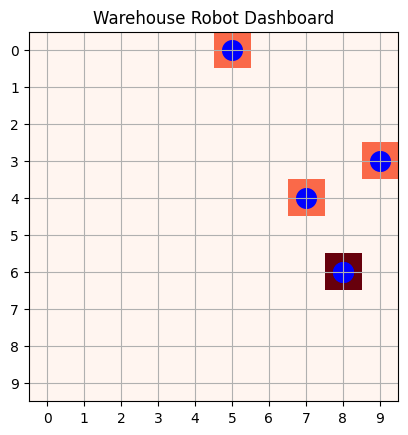

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Configuration
GRID_SIZE = (10, 10)
NUM_ROBOTS = 5
STEPS = 50
CONGESTION_THRESHOLD = 2

# Initialize robots randomly
robot_positions = np.array([[random.randint(0, GRID_SIZE[0]-1),
                             random.randint(0, GRID_SIZE[1]-1)]
                            for _ in range(NUM_ROBOTS)])

# Move robots randomly
def move_robots(positions):
    new_positions = positions.copy()
    for i, (x, y) in enumerate(positions):
        dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0), (0,0)])
        new_positions[i] = [np.clip(x+dx, 0, GRID_SIZE[0]-1), np.clip(y+dy, 0, GRID_SIZE[1]-1)]
    return new_positions

# Compute congestion
def compute_congestion(positions):
    grid = np.zeros(GRID_SIZE)
    for x, y in positions:
        grid[x, y] += 1
    return grid

# Plot setup
fig, ax = plt.subplots()
congestion = compute_congestion(robot_positions)
heatmap = ax.imshow(np.clip(congestion, 0, CONGESTION_THRESHOLD), 
                    cmap='Reds', vmin=0, vmax=CONGESTION_THRESHOLD)
robot_scat = ax.scatter(robot_positions[:,1], robot_positions[:,0], c='blue', s=200)
ax.set_title("Warehouse Robot Dashboard")
ax.set_xticks(range(GRID_SIZE[1]))
ax.set_yticks(range(GRID_SIZE[0]))
ax.grid(True)

# Update function
def update(frame):
    global robot_positions
    robot_positions = move_robots(robot_positions)
    congestion = compute_congestion(robot_positions)
    heatmap.set_data(np.clip(congestion, 0, CONGESTION_THRESHOLD))
    robot_scat.set_offsets(robot_positions[:, [1,0]])  # swap x/y for plotting
    ax.set_xlabel(f"Step {frame+1}")
    return heatmap, robot_scat

# Animate
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=500)

# Keep a reference to ani to prevent garbage collection
plt.show()




---

# **Warehouse Robot Movement & Congestion Dashboard**

**What This Code Does (Simply):**

1. **Setup a Grid:** Creates a 10x10 grid representing a warehouse.
2. **Place Robots:** Randomly positions 5 robots on the grid.
3. **Move Robots:** Each robot moves randomly (up, down, left, right, or stays in place) at every step.
4. **Track Congestion:** Counts how many robots are on each cell — if more than 2 robots are on a cell, it’s considered congested.
5. **Visualize in Real-Time:**

   * Shows a **heatmap** of congestion (redder = more crowded).
   * Shows **robots as blue dots** moving around the grid.
   * Updates the grid **step by step** using animation.
6. **Dashboard Features:** Grid lines, robot positions, and step number are displayed dynamically.

**Purpose:**
This is a **live simulation dashboard** for monitoring robot movements and congestion in a warehouse, helping visualize how robots navigate and where traffic jams happen.

---




# **Line-by-Line Explanation: Warehouse Robot Movement & Congestion Dashboard**

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
```

* **Imports required libraries:**

  * `numpy` → for numerical operations and arrays.
  * `matplotlib.pyplot` → for plotting charts and grids.
  * `matplotlib.animation` → for creating animations.
  * `random` → for random robot movements.

```python
# Configuration
GRID_SIZE = (10, 10)
NUM_ROBOTS = 5
STEPS = 50
CONGESTION_THRESHOLD = 2
```

* **Configuration section:**

  * `GRID_SIZE` → size of the warehouse grid (10x10).
  * `NUM_ROBOTS` → total robots in the warehouse (5).
  * `STEPS` → total steps the simulation will run (50).
  * `CONGESTION_THRESHOLD` → maximum robots allowed per cell before it’s considered crowded.

```python
# Initialize robots randomly
robot_positions = np.array([[random.randint(0, GRID_SIZE[0]-1),
                             random.randint(0, GRID_SIZE[1]-1)]
                            for _ in range(NUM_ROBOTS)])
```

* **Randomly places robots on the grid:**

  * Creates a 2D array where each robot has `[x, y]` coordinates.
  * `random.randint` ensures positions are inside the grid.

```python
# Move robots randomly
def move_robots(positions):
    new_positions = positions.copy()
    for i, (x, y) in enumerate(positions):
        dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0), (0,0)])
        new_positions[i] = [np.clip(x+dx, 0, GRID_SIZE[0]-1), np.clip(y+dy, 0, GRID_SIZE[1]-1)]
    return new_positions
```

* **Defines robot movement function:**

  * Loops through all robots.
  * Chooses a **random direction**: up, down, left, right, or stay in place.
  * `np.clip` ensures robots **don’t move outside the grid**.
  * Returns the new positions after moving.

```python
# Compute congestion
def compute_congestion(positions):
    grid = np.zeros(GRID_SIZE)
    for x, y in positions:
        grid[x, y] += 1
    return grid
```

* **Calculates congestion:**

  * Creates a grid filled with zeros.
  * Adds `1` to each cell where a robot is present.
  * Returns the congestion grid.

```python
# Plot setup
fig, ax = plt.subplots()
congestion = compute_congestion(robot_positions)
heatmap = ax.imshow(np.clip(congestion, 0, CONGESTION_THRESHOLD), 
                    cmap='Reds', vmin=0, vmax=CONGESTION_THRESHOLD)
robot_scat = ax.scatter(robot_positions[:,1], robot_positions[:,0], c='blue', s=200)
ax.set_title("Warehouse Robot Dashboard")
ax.set_xticks(range(GRID_SIZE[1]))
ax.set_yticks(range(GRID_SIZE[0]))
ax.grid(True)
```

* **Initializes the plot:**

  * `fig, ax = plt.subplots()` → creates the figure and axes.
  * `imshow` → shows the congestion as a **heatmap** with red intensity.
  * `scatter` → plots robots as **blue dots**.
  * Adds title, grid lines, and axis ticks.

```python
# Update function
def update(frame):
    global robot_positions
    robot_positions = move_robots(robot_positions)
    congestion = compute_congestion(robot_positions)
    heatmap.set_data(np.clip(congestion, 0, CONGESTION_THRESHOLD))
    robot_scat.set_offsets(robot_positions[:, [1,0]])  # swap x/y for plotting
    ax.set_xlabel(f"Step {frame+1}")
    return heatmap, robot_scat
```

* **Defines the animation update:**

  * Moves robots using `move_robots`.
  * Computes new congestion.
  * Updates the heatmap and robot positions dynamically.
  * Updates the **step number** in the x-axis label.

```python
# Animate
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=500)
```

* **Creates animation:**

  * Calls `update` function every **500 ms** for `STEPS` times.

```python
# Keep a reference to ani to prevent garbage collection
plt.show()
```

* **Displays the animation:**

  * `plt.show()` renders the live warehouse dashboard.
  * Keeping a reference to `ani` ensures the animation **doesn’t disappear** immediately.

---





# **Warehouse Robot Simulation – 100 Interview Questions & Answers**

---

## **Easy (30 Questions)**

1. **Q:** What does `numpy` (`np`) do in this code?
   **A:** It is used for array manipulation, creating the robot position arrays, and performing numerical operations efficiently.

2. **Q:** What is `matplotlib.pyplot` used for?
   **A:** It is used for plotting the warehouse grid, robot positions, and heatmaps.

3. **Q:** What is `matplotlib.animation` used for?
   **A:** To create an animated visualization of robots moving over multiple steps.

4. **Q:** Why do we use `random.randint`?
   **A:** To randomly initialize robot positions on the grid.

5. **Q:** What does `GRID_SIZE = (10, 10)` represent?
   **A:** The warehouse grid has 10 rows and 10 columns.

6. **Q:** What is `NUM_ROBOTS = 5`?
   **A:** Number of robots being simulated in the warehouse.

7. **Q:** What is `STEPS = 50`?
   **A:** The number of animation steps or time steps in the simulation.

8. **Q:** What does `CONGESTION_THRESHOLD = 2` mean?
   **A:** If more than 2 robots are on the same cell, it is considered congested.

9. **Q:** How are robot positions stored?
   **A:** As a NumPy array of shape `(NUM_ROBOTS, 2)` with x and y coordinates.

10. **Q:** What is the purpose of `move_robots()` function?
    **A:** To move robots randomly in one of the four directions or stay in place.

11. **Q:** Why do we use `np.clip()`?
    **A:** To prevent robots from moving outside the grid boundaries.

12. **Q:** What does `compute_congestion()` do?
    **A:** Counts the number of robots in each grid cell and returns a congestion matrix.

13. **Q:** What does `ax.imshow()` do?
    **A:** Displays a 2D heatmap of the congestion grid.

14. **Q:** What does `ax.scatter()` do?
    **A:** Plots robot positions as blue dots on the grid.

15. **Q:** Why swap `[1,0]` in `robot_scat.set_offsets(robot_positions[:, [1,0]])`?
    **A:** Because scatter expects (x, y) coordinates but the array is (row, col).

16. **Q:** What does `animation.FuncAnimation()` do?
    **A:** Animates the update function over multiple frames to show robot movement.

17. **Q:** Why use `global robot_positions` inside `update()`?
    **A:** To modify the robot positions variable defined outside the function.

18. **Q:** What color are the robots in the visualization?
    **A:** Blue.

19. **Q:** What color represents congestion in the heatmap?
    **A:** Red (darker = more congested).

20. **Q:** What does `np.zeros(GRID_SIZE)` do in `compute_congestion()`?
    **A:** Creates an empty grid initialized with zeros to track congestion.

21. **Q:** What is the role of `ax.set_title()`?
    **A:** Sets the title of the plot as "Warehouse Robot Dashboard".

22. **Q:** Why do we use `ax.set_xticks()` and `ax.set_yticks()`?
    **A:** To show tick marks for grid cells.

23. **Q:** Why is `ax.grid(True)` used?
    **A:** To display grid lines on the plot for better visualization.

24. **Q:** What is the purpose of `interval=500` in `FuncAnimation`?
    **A:** Each frame is displayed for 500 milliseconds.

25. **Q:** Can `random.choice([(0,1), (1,0), (0,-1), (-1,0), (0,0)])` be modified?
    **A:** Yes, you can add diagonal movements like `(1,1)` for more complex simulation.

26. **Q:** How does the animation show step numbers?
    **A:** `ax.set_xlabel(f"Step {frame+1}")` updates the label every frame.

27. **Q:** Why is `plt.show()` used at the end?
    **A:** To display the plot and start the animation.

28. **Q:** What happens if we remove `np.clip()`?
    **A:** Robots may move outside the grid, causing errors or wrong visualization.

29. **Q:** What data type is `robot_positions`?
    **A:** NumPy array of integers.

30. **Q:** Can the grid size be changed?
    **A:** Yes, by modifying `GRID_SIZE`.

---

## **Moderate (40 Questions)**

31. **Q:** How does `move_robots()` ensure robots do not leave the grid?
    **A:** Uses `np.clip(x+dx, 0, GRID_SIZE[0]-1)` for both x and y coordinates.

32. **Q:** Why do we use `positions.copy()` in `move_robots()`?
    **A:** To avoid modifying the original positions array directly.

33. **Q:** What is the shape of the congestion grid?
    **A:** `(GRID_SIZE[0], GRID_SIZE[1])`, same as the warehouse grid.

34. **Q:** Can this simulation handle more than 5 robots?
    **A:** Yes, just increase `NUM_ROBOTS`.

35. **Q:** What is the role of `np.clip(congestion, 0, CONGESTION_THRESHOLD)`?
    **A:** Limits the heatmap values to max `CONGESTION_THRESHOLD` for visualization.

36. **Q:** How do you change robot color dynamically?
    **A:** Use `robot_scat.set_color()` inside `update()`.

37. **Q:** Can you add robot IDs on the plot?
    **A:** Yes, using `ax.text(x, y, str(id))`.

38. **Q:** How would you track the path of robots over time?
    **A:** Store past positions in a list and plot lines with `ax.plot()`.

39. **Q:** What is the complexity of `compute_congestion()`?
    **A:** O(NUM\_ROBOTS) per frame.

40. **Q:** How do you change animation speed?
    **A:** Modify `interval` in `FuncAnimation`.

41. **Q:** What is the effect of increasing `STEPS`?
    **A:** The animation runs for more frames.

42. **Q:** How do you add diagonal robot movements?
    **A:** Include `(1,1), (-1,-1), (1,-1), (-1,1)` in `random.choice()`.

43. **Q:** Can `compute_congestion()` be vectorized for performance?
    **A:** Yes, using `np.add.at(grid, (x_indices, y_indices), 1)`.

44. **Q:** How to pause the animation?
    **A:** Use `ani.event_source.stop()`.

45. **Q:** How to resume animation?
    **A:** Use `ani.event_source.start()`.

46. **Q:** How to save the animation as a video?
    **A:** Use `ani.save('filename.mp4', writer='ffmpeg')`.

47. **Q:** How can multiple congestion thresholds be visualized?
    **A:** Use different color maps or thresholds for heatmap clipping.

48. **Q:** What happens if two robots occupy the same cell?
    **A:** The congestion count increases, visualized as darker red.

49. **Q:** How to add labels for each robot?
    **A:** Use `ax.text()` inside `update()` to label each robot dynamically.

50. **Q:** Can we simulate robot collisions?
    **A:** Yes, add a condition in `move_robots()` to prevent overlapping.

51. **Q:** How to modify grid size during animation?
    **A:** Update `GRID_SIZE` and recreate axes, heatmap, and scatter plot.

52. **Q:** How to track congestion statistics?
    **A:** Store `compute_congestion()` results in a list and analyze later.

53. **Q:** How do you change robot marker size?
    **A:** Modify `s=200` in `ax.scatter()`.

54. **Q:** How to use different color for highly congested cells?
    **A:** Use `cmap='Reds'` with custom normalization.

55. **Q:** How to randomize initial robot positions without overlap?
    **A:** Keep a set of occupied cells and pick new positions until free.

56. **Q:** How to detect congestion in real-time?
    **A:** Check `grid[x,y] > CONGESTION_THRESHOLD` in `update()`.

57. **Q:** How to display robot velocity?
    **A:** Compute difference between current and previous positions.

58. **Q:** Can robots move more than 1 step per frame?
    **A:** Yes, modify `dx, dy` to include values like `(0,2)` etc.

59. **Q:** How to change heatmap transparency?
    **A:** Use `alpha` parameter in `imshow()`.

60. **Q:** How to dynamically increase `NUM_ROBOTS` during animation?
    **A:** Append new robots to `robot_positions` array.

61. **Q:** How to visualize only congested cells?
    **A:** Set `grid` values < threshold to NaN or zero.

62. **Q:** How to make robots follow a path instead of random moves?
    **A:** Replace `random.choice()` with a predefined path or algorithm.

63. **Q:** How to highlight the most congested cell?
    **A:** Use `ax.scatter()` with a larger size or bright color.

64. **Q:** Can we use `pandas` for congestion tracking?
    **A:** Yes, store congestion grids in a DataFrame for analysis.

65. **Q:** How to compute average congestion per step?
    **A:** `np.mean(congestion)` each frame.

66. **Q:** How to simulate dynamic obstacles?
    **A:** Treat them as static robots and include in `compute_congestion()`.

67. **Q:** How to run animation faster without changing `interval`?
    **A:** Reduce `STEPS` or use a faster computer.

68. **Q:** How to log robot positions to a file?
    **A:** Use `np.savetxt()` or `csv.writer()` each frame.

69. **Q:** How to make animation interactive?
    **A:** Use `matplotlib.widgets` for buttons to start/pause/reset.

70. **Q:** How to add robot color based on congestion?
    **A:** Change `c` parameter in `scatter()` dynamically based on cell count.

---

## **Hard (30 Questions)**

71. **Q:** How to vectorize `move_robots()` for all robots using NumPy?
    **A:** Generate random `dx, dy` arrays and use `np.clip()` for all robots in one operation.

72. **Q:** How to implement A\* pathfinding for robots?
    **A:** Use a grid representation with obstacles and compute shortest path using A\* algorithm.

73. **Q:** How to integrate collision avoidance between robots?
    **A:** Check if target cell is occupied before moving, or implement priority rules.

74. **Q:** How to implement multi-threaded animation?
    **A:** Use Python `threading` or `asyncio` to update robot positions separately.

75. **Q:** How to store robot positions for later replay?
    **A:** Maintain a 3D array `positions[step][robot][x,y]`.

76. **Q:** How to dynamically change congestion threshold during animation?
    **A:** Pass threshold as a parameter and update `np.clip()` in `update()`.

77. **Q:** How to implement smarter robot movement?
    **A:** Use reinforcement learning or shortest-path algorithms instead of random movement.

78. **Q:** How to compute congestion heatmap efficiently for large grids?
    **A:** Use `np.add.at()` or `scipy.sparse` arrays.

79. **Q:** How to integrate this with a real warehouse robot simulator?
    **A:** Replace random moves with real robot telemetry data.

80. **Q:** How to generate alerts for highly congested cells?
    **A:** Check `grid[x,y] > threshold` and trigger a notification or plot marker.

81. **Q:** How to animate multiple warehouses at once?
    **A:** Use multiple subplots and animate each independently.

82. **Q:** How to optimize for thousands of robots?
    **A:** Vectorize all operations and reduce plotting overhead.

83. **Q:** How to implement different robot types with priorities?
    **A:** Assign each robot a type and modify `move_robots()` accordingly.

84. **Q:** How to integrate obstacles dynamically in the grid?
    **A:** Mark cells as blocked and prevent robots from moving into them.

85. **Q:** How to compute congestion trends over time?
    **A:** Store `compute_congestion()` grids and analyze with `numpy` or `pandas`.

86. **Q:** How to visualize robot paths with trails?
    **A:** Maintain a list of past positions and use `ax.plot()` for each robot.

87. **Q:** How to simulate robot failures?
    **A:** Randomly freeze some robots for a few steps.

88. **Q:** How to implement real-time user control of robots?
    **A:** Capture keyboard or GUI inputs and override `move_robots()` movements.

89. **Q:** How to use heatmap for predictive congestion?
    **A:** Analyze past positions and compute probability distribution for future congestion.

90. **Q:** How to parallelize `compute_congestion()` for efficiency?
    **A:** Use `numba` or `multiprocessing` to compute congestion on different grid sections.

91. **Q:** How to combine this with pathfinding visualization?
    **A:** Overlay robot paths and destination points on the heatmap.

92. **Q:** How to simulate dynamic warehouse layout changes?
    **A:** Modify grid and obstacles during animation steps.

93. **Q:** How to integrate live data feed from IoT robots?
    **A:** Update `robot_positions` from incoming data in `update()`.

94. **Q:** How to scale to a 3D warehouse grid?
    **A:** Add a Z-coordinate and visualize with 3D plotting tools like `mpl_toolkits.mplot3d`.

95. **Q:** How to implement congestion-aware robot navigation?
    **A:** Make robots avoid cells where `grid[x,y] > threshold`.

96. **Q:** How to simulate emergency evacuation of robots?
    **A:** Define exit cells and move robots toward them using pathfinding.

97. **Q:** How to integrate AI-based movement strategy?
    **A:** Use reinforcement learning algorithms like PPO/DQN to decide robot actions.

98. **Q:** How to implement real-time congestion alerts?
    **A:** Check `grid` values each frame and trigger visual or sound alerts.

99. **Q:** How to make the dashboard interactive with sliders?
    **A:** Use `matplotlib.widgets.Slider` to adjust parameters like speed or threshold.

100. **Q:** How to export animation and congestion data for reports?
     **A:** Save animation as MP4/GIF and `np.savetxt()` or `pandas.to_csv()` congestion logs.

---

